In [1]:
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Numerical Parameters

# Grid Points and Time Steps
N = int(2e2+1) # +1 for Off-By-One on Periodic BC
M = int(2e2+1)
T = int(1e2+1)
# Domain Size
L = 10
K = 10
# Domain
x = np.linspace(0, L, N)
y = np.linspace(0, K, M)
# Grid Size and Time Step Size
dx = x[2] - x[1]
dy = y[2] - y[1]
dt = 1e-3

t = dt * T
tot_snaps = 10
tot_snaps = int(T/tot_snaps) # TODO: Knob
snap = 0

In [3]:
# Mathematical Parameters
lambda_x = dt / dx
lambda_y = dt / dy

rho_0 = 3 / (4 * np.pi)
# Gamma_0 = input("Enter Gamma_0: ")
# kappa_0 = input("Enter kappa_0: ")
beta = 1
correlation = [False, True]

In [4]:
# Correlation Parameters FIX FOR DOMAIN
k_fft_norm = 2 * np.pi / (N * dx)
k = k_fft_norm * np.linspace(-N / 2, N / 2 - 1, N)  # Fourier Domain
x3 = np.linspace(-L, 2 * L, 3 * N - 2)  # Correlation Domain

In [5]:
# Initial Conditions
disp_freq = 3 * 2 * np.pi / L
rho_IC = rho_0 * np.ones(N) + .1 * np.sin(disp_freq * x)
v_IC = np.ones(N)
v_IC[:int(N/2)] = -1

In [6]:
# Memory Allocation
def allocate_memory(u_IC):
    tot_u = np.zeros((T,N))
    tot_uc = np.zeros((T,N))
    u = np.copy(u_IC)
    uc = np.copy(u_IC)
    tot_u[0] = np.copy(u_IC)
    tot_uc[0] = np.copy(u_IC)
    return u, uc, tot_u

rho, rhoc, tot_rho = allocate_memory(rho_IC)
v, vc, tot_v = allocate_memory(v_IC)

sys = [rho,v]
sysc = [rhoc, vc]

In [7]:
# def update(u):
#     uR = np.copy(u)
#     uL = np.roll(u,1)
#     return uL, uR

def den_flux(den,vel): return den*vel

def vel_flux(den,vel): return .5*vel*vel+np.log(den)

def godunov(u, f):
    godunov_flux = np.zeros(N)
    for ii in range(N):
        if u[ii-1] > u[ii]:
            godunov_flux[ii] = np.maximum(f[ii-1], f[ii])
        elif u[ii-1] < u[ii]:
            godunov_flux[ii] = np.minimum(f[ii-1], f[ii])
        else:
            godunov_flux[ii] = 0.0  # TODO: flux == 0 for constanst initial condition
    return godunov_flux

In [8]:
def plot(tot_u):
    for ii in range(0, T, tot_snaps):
        plot = plt.plot(x, tot_u[ii])
    plt.show(block=False)

In [9]:
# Iterate Solution
for tt in range(T):
    # Find Fluxes
    rho_flux = den_flux(rho,v)
    v_flux = vel_flux(rho,v)
#     rho_flux = godunov(rho, rho_flux)
#     v_flux = godunov(v, v_flux)

    # print(rho_flux-np.roll(rho_flux,1))
    # Solve
    rho = rho-lambda_x*(rho_flux-np.roll(rho_flux,1))
    v = v-lambda_x*(v_flux-np.roll(v_flux,1))
    
    # Save Values
    tot_rho[tt] = np.copy(rho)
    
plt.show(block=False)

<ipython-input-7-8e5edb5dd247>:8: RuntimeWarning: invalid value encountered in log
  def vel_flux(den,vel): return .5*vel*vel+np.log(den)
<ipython-input-7-8e5edb5dd247>:6: RuntimeWarning: overflow encountered in multiply
  def den_flux(den,vel): return den*vel
<ipython-input-7-8e5edb5dd247>:8: RuntimeWarning: overflow encountered in multiply
  def vel_flux(den,vel): return .5*vel*vel+np.log(den)


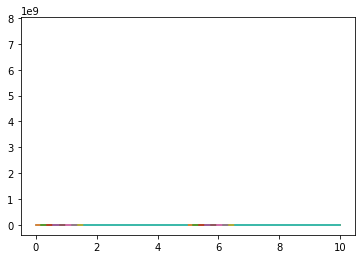

In [10]:
plt.figure()
plot(tot_rho)